# SD4Py Examples

This notebook contains examples of how to use the main functions included in the SD4Py package. 

## Preliminaries

### Dependencies: Java and JDK

First, it is important that Java and the Java Development Kit (JDK) have been installed. These are needed for SD4Py to work. If required, please follow the below installation steps.

To install java: Go to https://java.com/en/download/ and download and install the latest version of java. Go through each of the steps necessary for using the software.

To install the JDK: Please visit https://www.oracle.com/java/technologies/downloads/ and download and install the JDK version suited for your operating system.

### Install required python packages

The python packages required by SD4Py are contained within the `requirements.txt` file. If desired, the packages identified within `requirements.txt` can be installed using pip. To do so, you can uncomment and run the next cell in this notebook. 

In [1]:
#%pip install sd4py    # Uncomment this code to install the package with pip if it is not already installed

## Load SD4Py and related packages

Next, we will load SD4Py, which should complete without errors. We will also load numpy and pandas to help with creating and manipulating example data. 

In [2]:
import sd4py

In [3]:
import numpy as np
import pandas as pd

In [4]:
from matplotlib import pyplot as plt

## Generate some data

In order to showcase SD4Py, we need some data in a Pandas dataframe. 

The code below just generates a dataframe with a variety of different data types.  

In [5]:
np.random.seed(1)

df1 = pd.DataFrame(
    {
        "A": pd.Series(np.random.randn(1000), dtype="float16") - 1,
        "B": pd.Series(np.random.randn(1000)) + 1,
        "C": pd.Series(np.array(np.random.randn(1000), dtype="uint8")),
        "D": ["foo"]*700 + ["bar"]*300,
        "E": pd.date_range("2018-01-02", periods=1000, freq="H"),
        "F": ["red", "yellow"] * 500,
        "G": ([1]*5 + [10]*3 + [11,11]) * 100,
        "H": [pd.Timedelta(hours=x) for x in [1,3,8,8,5,7,7,7,7,6]*100],
        "I": np.random.choice([True, False], 1000, p=[0.8,0.2])
    }
)

df2 = pd.DataFrame(
    {
        "A": pd.Series(np.random.randn(1000), dtype="float16"),
        "B": pd.Series(np.random.randn(1000)),
        "C": pd.Series(np.array(np.random.randn(1000), dtype="uint8")),
        "D": ["foo"]*500 + ["bar"]*500,
        "E": pd.date_range("2018-01-01", periods=1000, freq="H"),
        "F": ["red", "yellow", "green", "blue","magenta"] * 200,
        "G": ([1]*5 + [10]*3 + [5,5]) * 100,
        "H": [pd.Timedelta(hours=x) for x in [1,3,2,6,5,2,5,9,1,6]*100],
        "I": np.random.choice([True, False], 1000, p=[0.2,0.8])
    }
)

df = pd.concat([df1, df2]).reset_index(drop=True)

In [6]:
df.head()

,A,B,C,D,E,F,G,H,I
0,0.624023,0.846764,0,foo,2018-01-02 00:00:00,red,1,0 days 01:00:00,False
1,-1.611328,-1.432509,0,foo,2018-01-02 01:00:00,yellow,1,0 days 03:00:00,False
2,-1.528320,1.507984,0,foo,2018-01-02 02:00:00,red,1,0 days 08:00:00,False
3,-2.074219,0.675968,0,foo,2018-01-02 03:00:00,yellow,1,0 days 08:00:00,True
4,-0.134766,-0.511077,254,foo,2018-01-02 04:00:00,red,1,0 days 05:00:00,True


## Discover subgroups

With a pandas dataframe containing the data we are interested in, performing subgroup discovery is quite easy. Below is the minimal code to perform subgroup discovery on a pandas dataframe. 

In [7]:
subgroups = sd4py.discover_subgroups(df, "A")

SDMapNum
Time - took: 89 ms. (74 ms. CPU time)
Steps: 120


The results from the `discover_subgroups()` function are returned in a custom `PySubgroupResults` object, which has three important attributes: 

 * `subgroups`, a list of custom `PySubgroup` objects 
 * `population_value`, the average target value of the full dataset, and
 * `population_size`, the size of the full dataset. 

It also has a convenient `to_dataframe()` function that converts the results into a dataframe for easy viewing. 

A `PySubgroup` object contains the quality, subgroup size, average target value, and a list of custom selector objects. 

The selector objects come in two varieties. `PyNominalSelector` objects contain a column name and a corresponding value. `PyNumericSelector` objects contain a column name, a minimum value, and a maximum value.

Now, let's call the `PySubgroupResults.to_df()` function to take a look at the results.  

In [8]:
subgroups.to_df()

,pattern,target_evaluation,size,quality
0,I = False,-0.161183,987.0,280.546351
1,I = False AND C < 85.00,-0.188362,833.0,214.133153
2,I = False AND -0.51 <= B < 1.96,-0.171137,697.0,191.178574
3,H < 0 days 03:40:00 AND I = False,-0.046439,440.0,175.553882
4,D = bar AND I = False,-0.121951,473.0,153.002839
5,I = False AND G < 4.33,-0.130963,486.0,152.828299
6,H < 0 days 03:40:00,-0.234098,700.0,147.928430
7,H < 0 days 03:40:00 AND I = False AND C < 85.00,-0.063951,369.0,140.763788
8,I = False AND -0.51 <= B < 1.96 AND C < 85.00,-0.205662,583.0,139.781884
9,H < 0 days 03:40:00 AND I = False AND -0.51 <=...,-0.033673,310.0,127.643105


## Selecting rows from a dataframe based on a subgroup

After finding subgroups, it is possible to use them to select rows from a dataframe (i.e. select rows matching the pattern). 

This can be done on the same dataframe that was originally used to discover subgroups, or another dataframe with the same columns (which might be useful if, e.g., using a train/test split). 

In [9]:
results = sd4py.discover_subgroups(df, "A")

## Select rows based on the first subgroup
print(results.subgroups[0])

results.subgroups[0].get_rows(df)

SDMapNum
Time - took: 39 ms. (38 ms. CPU time)
Steps: 120
I = False


,A,B,C,D,E,F,G,H,I
0,0.624023,0.846764,0,foo,2018-01-02 00:00:00,red,1,0 days 01:00:00,False
1,-1.611328,-1.432509,0,foo,2018-01-02 01:00:00,yellow,1,0 days 03:00:00,False
2,-1.528320,1.507984,0,foo,2018-01-02 02:00:00,red,1,0 days 08:00:00,False
7,-1.761719,1.608749,0,foo,2018-01-02 07:00:00,yellow,10,0 days 07:00:00,False
17,-1.877930,-0.504891,254,foo,2018-01-02 17:00:00,yellow,10,0 days 07:00:00,False
...,...,...,...,...,...,...,...,...,...
1993,-1.621094,0.153997,0,bar,2018-02-11 09:00:00,blue,1,0 days 06:00:00,False
1994,-1.729492,-0.881276,0,bar,2018-02-11 10:00:00,magenta,1,0 days 05:00:00,False
1995,-0.274902,0.338310,0,bar,2018-02-11 11:00:00,red,10,0 days 02:00:00,False
1996,-1.500977,-0.034231,255,bar,2018-02-11 12:00:00,yellow,10,0 days 05:00:00,False


## Examples using more parameters

The below examples show the use of a more complex combination of parameters

In [10]:
sd4py.discover_subgroups(
    df, 
    target="I",
    included_attributes=["B", "E", "H", "I", "A"],
    nbins=5,
    method="bsd",
    qf="gain",
    k=100,
    minqual=0,
    minsize=0,
    mintp=1,
    max_selectors=7,
    ignore_defaults=True,
    filter_irrelevant=True,
    postfilter="weighted_covering",
    postfilter_param=5
).to_df()

,pattern,target_evaluation,size,quality
0,H < 0 days 02:36:00,0.326000,500.0,0.031828
1,1.47 <= B < 2.95,0.718499,373.0,0.030622
2,1.47 <= B < 2.95 AND 0 days 05:48:00 <= H < 0 ...,0.795181,166.0,0.023186
3,0.15 <= A < 1.56,0.357853,503.0,0.021641
4,0 days 05:48:00 <= H < 0 days 07:24:00,0.618571,700.0,0.019661


In [11]:
sd4py.discover_subgroups(
    df, 
    target="I",
    included_attributes=["B", "E", "H", "I", "A"],
    nbins=5,
    method="bsd",
    qf="chi2",
    k=10,
    minqual=0,
    minsize=0,
    mintp=10
).to_df()

,pattern,target_evaluation,size,quality
0,H < 0 days 02:36:00,0.326000,500.0,86.895352
1,1.47 <= B < 2.95,0.718499,373.0,82.442452
2,1.47 <= B < 2.95 AND 0 days 05:48:00 <= H < 0 ...,0.795181,166.0,60.354230
3,0.15 <= A < 1.56,0.357853,503.0,59.404939
4,0 days 05:48:00 <= H < 0 days 07:24:00,0.618571,700.0,54.113783
5,-2.65 <= A < -1.25,0.661939,423.0,51.854858
6,-1.50 <= B < -0.02,0.383562,584.0,49.875560
7,-1.25 <= A < 0.15 AND H < 0 days 02:36:00,0.304933,223.0,40.796305
8,1.47 <= B < 2.95 AND -2.65 <= A < -1.25,0.811881,101.0,39.686642
9,-2.65 <= A < -1.25 AND 0 days 05:48:00 <= H < ...,0.729282,181.0,39.515598


## Use bootstrapping to estimate confidence intervals for precision, recall and F1

SD4Py includes a helper function to estimate the prediction, recall and F1 using a bootstrapping method. 

To look at this functionality, we need subgroups trained on a binary target, which we obtain first.

The confidence intervals obtained in this manner give an idea of the relative variability of different subgroups, but they do not give any guarantee about how subgroups will perform on unseen data. They provide additional information that can be used to compare and contrast subgroups with one another. 

In [12]:
subgroups = sd4py.discover_subgroups(df, 'I', target_value=True, k=50)

In [13]:
precision_recall_trials, precision_recall_df = sd4py.extra.confidence_precision_recall_f1(
    subgroups, 
    df)

In [14]:
precision_recall_df.head()

,pattern,precision_lower,precision_upper,recall_lower,recall_upper,f1_lower,f1_upper
0,0 days 06:20:00 <= H,0.656469,0.773118,0.448623,0.560074,0.540662,0.634088
1,0 days 06:20:00 <= H AND C < 85.00,0.644876,0.777106,0.368961,0.471045,0.479266,0.579306
2,0 days 06:20:00 <= H AND -0.51 <= B < 1.96,0.658610,0.799042,0.314760,0.424096,0.436746,0.540964
3,0 days 06:20:00 <= H AND D = foo,0.676387,0.805250,0.292099,0.389692,0.419911,0.523127
4,0 days 06:20:00 <= H AND -1.72 <= A < 0.62,0.663937,0.793103,0.309417,0.418548,0.425933,0.544514


This information can be used to sort the subgroups according to (e.g.) the lower confidence interval on the F1:

In [15]:
subgroups_sorted = subgroups[
    precision_recall_df.sort_values('f1_lower', ascending=False).index.tolist()
]

## Select the top-k non-overlapping subgroups

If the subgroups have been sorted, we can use SD4Py to extract the top $k$ subgroups which have a limited overlap. We can specify the maximum overlap (in terms of Jaccard similarity coefficient) that is allowed between two subgroups in the results. 

Below, we select the top 10 subgroups that have a maximum Jaccard overlap of 0.8.

*Note: A Jaccard overlap of 0.8 betwen two subgroups (let's call them "subgroup A" and "subgroup B") means that: if we look at all of the rows of data that are selected by either subgroup A or subgroup B, then 80% are selected by both subgroup A and subgroup B.*

In [16]:
sg_top_10_nonoverlapping = sd4py.extra.first_k_non_overlapping(
    df, 
    subgroups_sorted,
    0.8
)

In [17]:
sg_top_10_nonoverlapping.to_df()

,pattern,target_evaluation,size,quality
0,D = foo,0.571667,1200.0,78.2000
1,0 days 06:20:00 <= H,0.714286,700.0,145.4500
2,D = foo AND -0.51 <= B < 1.96,0.575723,865.0,59.8775
3,D = foo AND -1.72 <= A < 0.62,0.580071,843.0,62.0205
4,F = yellow,0.634286,700.0,89.4500
5,F = red,0.632857,700.0,88.4500
6,0 days 06:20:00 <= H AND -0.51 <= B < 1.96,0.728682,516.0,114.6460
7,0 days 06:20:00 <= H AND -1.72 <= A < 0.62,0.722222,504.0,108.7240
8,0 days 06:20:00 <= H AND D = foo,0.742553,470.0,110.9450
9,0 days 06:20:00 <= H AND 7.67 <= G,0.674000,500.0,83.7500


## Visualising the variability of subgroups through boxplots

SD4Py provides a visualisation which uses boxplots to indicate the variability of subgroups. 

This accepts the results from bootstrapping, i.e., running multiple trials with different samples of the data and checking the average value of the target variable. 

First, we run the bootstrapping process, and then we visualise the results, using two functions from SD4Py. 

Within the visualisation, the horizontal spread of the boxes indicates the variability of the subgroup across multiple bootstrapping trials, and the vertical thickness of the boxes is an indicator of how large the subgroups are (how many data points they select on average, relative to one another). 

In [18]:
ci_trials, ci_df = sd4py.extra.confidence_intervals(sg_top_10_nonoverlapping, df)

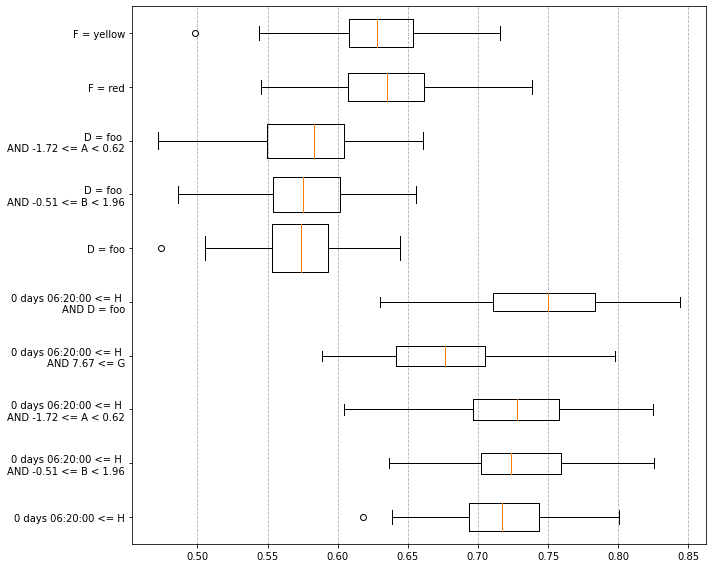

In [19]:
plt.rcParams["figure.figsize"] = (10, 8)
sd4py.extra.confidence_intervals_to_boxplots(ci_trials)
plt.tight_layout()
plt.show()

## Visualising the similarity of subgroups

SD4Py also includes a function to visualise the similarity of subgroups, based on the Jaccard similarity coefficient between pairs of subgroups. 

Below, we use this function to display the subgroups in a network diagram, where a stronger/thicker edge between two subgroups indicates that they are more similar:

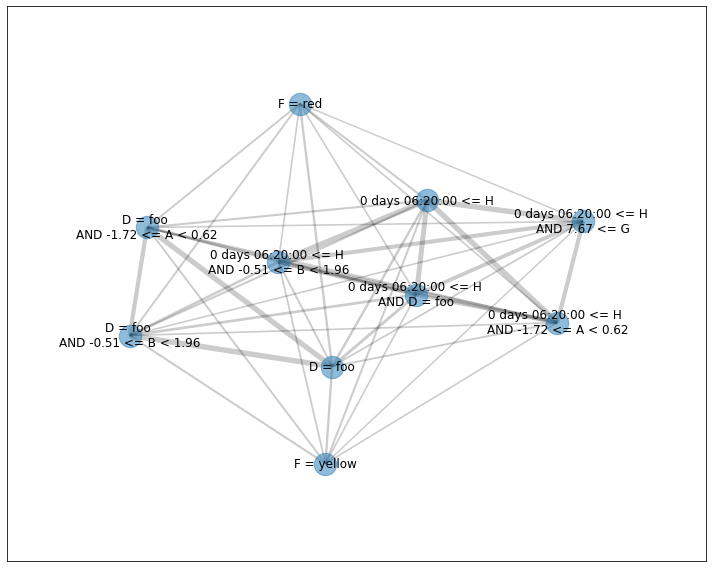

In [20]:
sd4py.extra.jaccard_visualisation(
    sg_top_10_nonoverlapping,
    df
)
plt.rcParams["figure.figsize"] = (8, 8)
plt.tight_layout()
plt.show()

## Focusing on a single subgroup

SD4Py also includes a visualisation that focuses upon a single subgroup, and displays information about what makes that subgroup distinctive, compared to the rest of the dataset (note: the rest of the dataset is also known as the 'complement'). 

In particular, variables which have an unusual value, or which are involved in defining the subgroup, are shown. 

This requires selecting a single subgroup, and passing it into the SD4Py function:

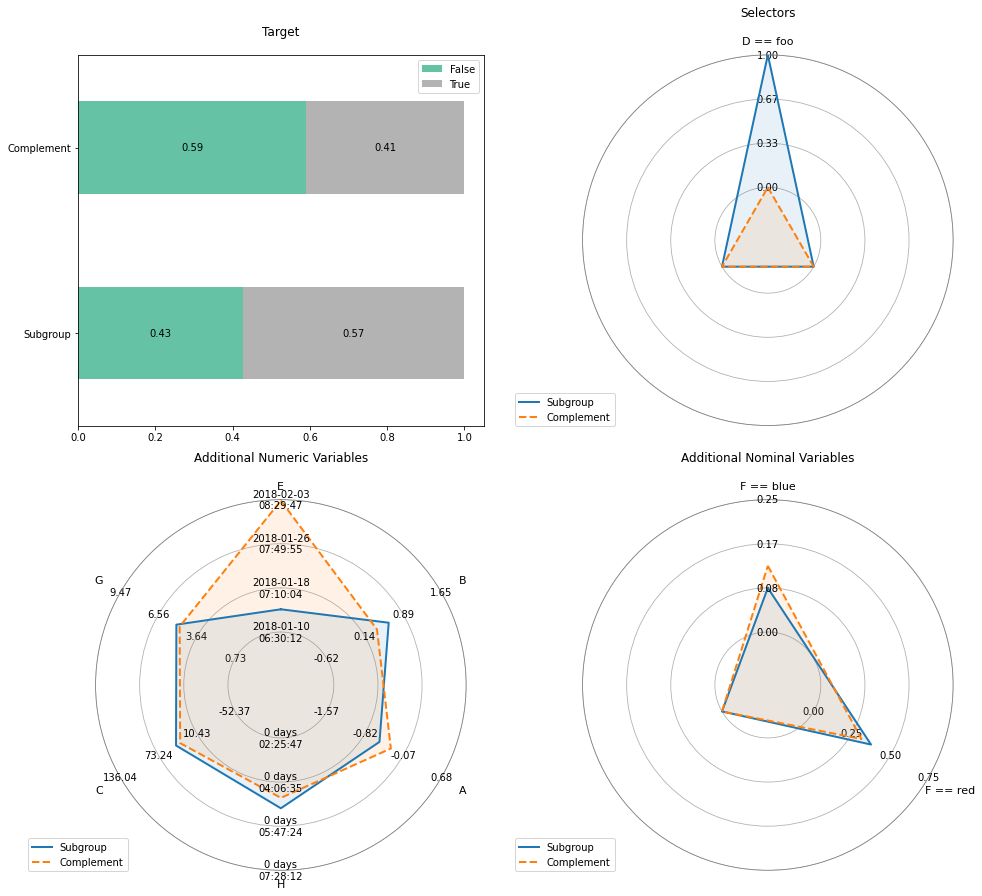

In [21]:
plt.rcParams["figure.figsize"] = (16, 15)
plt.tight_layout()
sd4py.extra.subgroup_overview(
    sg_top_10_nonoverlapping[0],
    df
)
plt.show()